In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_kmeans = pd.read_csv('ames.csv', sep=',')
df_kmeans.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YearSold,SaleType,SaleCondition,SalePrice
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141.0,31770.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,NaN,0.0,5,2010,WD,Normal,215000
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80.0,11622.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,0.0,No_Pool,Minimum_Privacy,NaN,0.0,6,2010,WD,Normal,105000
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81.0,14267.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,Gar2,12500.0,6,2010,WD,Normal,172000
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93.0,11160.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,NaN,0.0,4,2010,WD,Normal,244000
4,Two_Story_1946_and_Newer,Residential_Low_Density,74.0,13830.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,0.0,No_Pool,Minimum_Privacy,NaN,0.0,3,2010,WD,Normal,189900


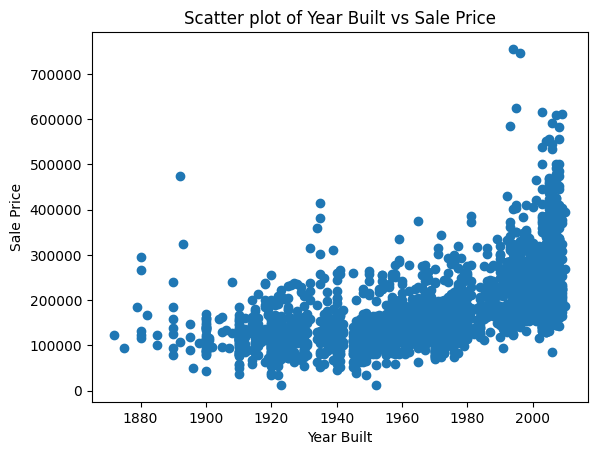

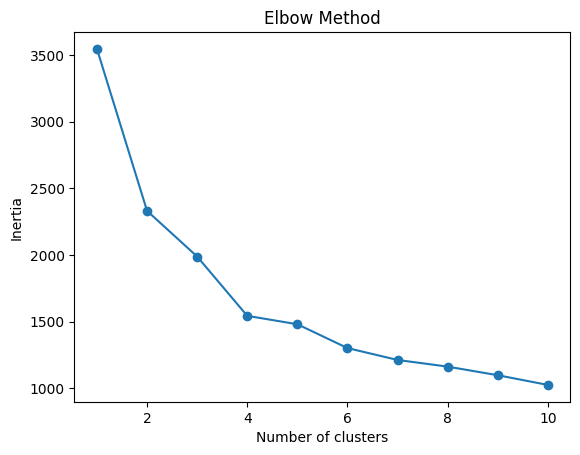

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


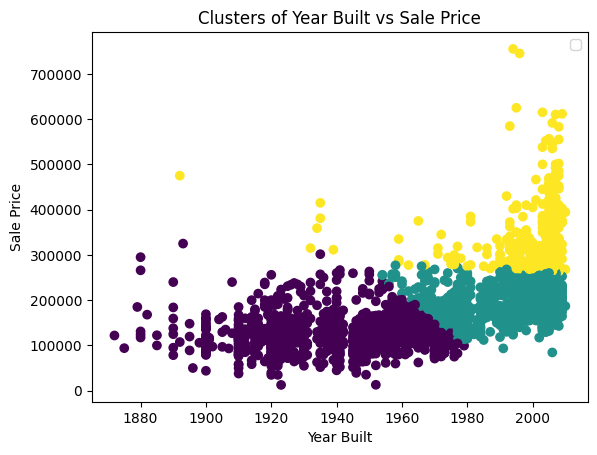

In [5]:
X = df_kmeans[['YearBuilt', 'SalePrice']].values

# Check for missing values and handle them if any
X = X[~np.isnan(X).any(axis=1)]

# Visualize the data before clustering
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('Year Built')
plt.ylabel('Sale Price')
plt.title('Scatter plot of Year Built vs Sale Price')
plt.show()

# Normalize the data
X_normalized = (X - X.mean(axis=0)) / X.std(axis=0)

# Implement K-means algorithm
def k_means(X, K, max_iters=100):
    centroids = X[np.random.choice(range(X.shape[0]), K, replace=False)]
    for _ in range(max_iters):
        # Assign clusters
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        clusters = np.argmin(distances, axis=0)
        # Update centroids
        new_centroids = np.array([X[clusters == k].mean(axis=0) for k in range(K)])
        # Check convergence
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return clusters, centroids

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    clusters, centroids = k_means(X_normalized, k)
    inertia.append(np.sum(np.sqrt(((X_normalized - centroids[clusters])**2).sum(axis=1))))

# Plot the Elbow Method
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# From the elbow method, we can see that 3 clusters seem to be a good choice

# Applying k-means clustering
clusters, centroids = k_means(X_normalized, 3)

# Applying k-means clustering
clusters, centroids = k_means(X_normalized, 3)

# Visualizing the clusters
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Year Built')
plt.ylabel('Sale Price')
plt.title('Clusters of Year Built vs Sale Price')
plt.legend()
plt.show()